In [1]:
ls!

ls: cannot access '!': No such file or directory


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 

In [3]:
mareas_df = pd.read_csv("../inputs/mareas_retorno_full_data_all_seasons.csv")
mareas_df.head()

,Marea,Planta,Embarcacion,Bodega,% Llenado,# Calas,TDC-Desc,TVN,año,temporada_año
0,127905,CHIMBOTE,TASA 32,Tradicional,10.0,1,8.05,22.98,2018,2018-I
1,127906,CHIMBOTE,TASA 34,Estanca,13.0,1,7.18,21.16,2018,2018-I
2,127910,MALABRIGO,TASA 57,Frio,33.0,3,18.82,24.17,2018,2018-I
3,127911,MALABRIGO,TASA 41,Frio,14.0,2,22.28,25.26,2018,2018-I
4,127912,MALABRIGO,TASA 37,Estanca,17.0,1,7.98,18.44,2018,2018-I


In [4]:
mareas_df.describe()

,Marea,% Llenado,# Calas,TDC-Desc,TVN,año
count,11321.000000,8501.000000,11321.000000,11321.000000,11321.000000,11321.000000
mean,147455.640579,45.770262,2.307658,14.750327,23.129334,2019.028708
std,8568.831266,29.163229,1.326324,7.646248,6.384612,0.684616
min,127891.000000,0.000000,1.000000,0.000000,0.000000,2018.000000
25%,144485.000000,20.000000,1.000000,10.000000,19.000000,2019.000000
50%,148462.000000,42.000000,2.000000,13.000000,21.700000,2019.000000
75%,153946.000000,70.000000,3.000000,17.370000,25.700000,2019.000000
max,158809.000000,151.000000,18.000000,166.550000,100.300000,2020.000000


In [5]:
mareas_df = mareas_df[(mareas_df['TDC-Desc'] > 4) & (mareas_df['TDC-Desc'] < 32)]
mareas_df = mareas_df[(mareas_df['TVN'] > 10) & (mareas_df['TVN'] < 40)]
mareas_df.describe()

,Marea,% Llenado,# Calas,TDC-Desc,TVN,año
count,10439.000000,7813.000000,10439.000000,10439.000000,10439.000000,10439.000000
mean,147317.445445,45.552925,2.207204,13.667816,22.647861,2019.024044
std,8633.720988,29.265989,1.147188,5.155287,5.096616,0.691763
min,127891.000000,0.000000,1.000000,4.070000,10.250000,2018.000000
25%,144377.000000,20.000000,1.000000,10.000000,18.980000,2019.000000
50%,148036.000000,41.000000,2.000000,13.000000,21.600000,2019.000000
75%,155362.500000,70.000000,3.000000,16.575000,25.300000,2020.000000
max,158809.000000,151.000000,18.000000,31.820000,39.900000,2020.000000


In [6]:
mareas_df['TDC_2'] = np.power((mareas_df['TDC-Desc']), 2)

In [7]:
## Setting model features
baseline_feature = ['TDC-Desc']
#X_features = ['TDC-Desc','% Llenado','# Calas']
X_features = ['TDC-Desc']
y_feature = 'TVN'

#model_frio = xgb.XGBRegressor(n_estimators=5, learning_rate=0.5)
#model_tradicional = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
#model_tradicional = LinearRegression(normalize=True, fit_intercept=False)

model_frio = LinearRegression(normalize=True, fit_intercept=False)
model_tradicional = LinearRegression(normalize=True, fit_intercept=False)


In [8]:
# Separating between bodega type

mareas_tdc_frio_df = mareas_df.loc[mareas_df['Bodega'] == 'Frio']
print('mareas frio shape: ', mareas_tdc_frio_df.shape)
mareas_tdc_tradicional_df = mareas_df.loc[(mareas_df['Bodega'] == 'Tradicional') | (mareas_df['Bodega'] == 'Estanca')]
print('mareas tradicional shape: ', mareas_tdc_tradicional_df.shape)

mareas frio shape:  (1864, 11)
mareas tradicional shape:  (8575, 11)


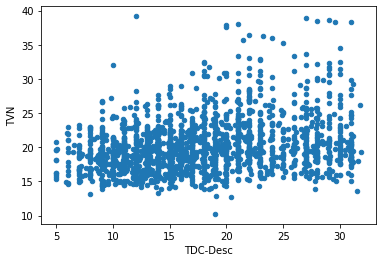

In [9]:
mareas_tdc_frio_df.plot.scatter(x='TDC-Desc', y='TVN')

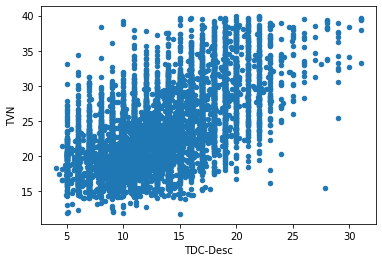

In [10]:
mareas_tdc_tradicional_df.plot.scatter(x='TDC-Desc', y='TVN')

In [11]:
## Define baselines for frio and tradicional

y_frio = mareas_tdc_frio_df[y_feature]
X_frio = mareas_tdc_frio_df[baseline_feature]
y_baseline = X_frio * 1.2
error_baseline_frio = mean_absolute_error(y_frio, y_baseline)
print('error_baseline_frio', error_baseline_frio)

y_tradicional = mareas_tdc_tradicional_df[y_feature]
X_tradicional = mareas_tdc_tradicional_df[baseline_feature]
y_baseline = X_tradicional * 1.8
error_baseline_tradicional = mean_absolute_error(y_tradicional, y_baseline)
print('error_baseline_tradicional', error_baseline_tradicional)

error_baseline_frio 6.249866416309013
error_baseline_tradicional 4.660874052478134


In [12]:
X_frio_df = mareas_tdc_frio_df[X_features]
y_frio_df = mareas_tdc_frio_df[y_feature]

X_tradicional_df = mareas_tdc_tradicional_df[X_features]
y_tradicional_df = mareas_tdc_tradicional_df[y_feature]

X_train_frio, X_test_frio, y_train_frio, y_test_frio = train_test_split(X_frio_df, y_frio_df, test_size=0.2, random_state=10)

X_train_tradicional, X_test_tradicional, y_train_tradicional, y_test_tradicional = train_test_split(X_tradicional_df, y_tradicional_df, test_size=0.2, random_state=25)

In [13]:
mareas_2019_2 = pd.read_csv("../inputs/mareas_retorno_2019_2.csv")
mareas_2019_2_frio_df = mareas_df.loc[mareas_df['Bodega'] == 'Frio']
print('mareas frio shape: ', mareas_tdc_frio_df.shape)
mareas_2019_2_tradicional_df = mareas_df.loc[(mareas_df['Bodega'] == 'Tradicional') | (mareas_df['Bodega'] == 'Estanca')]
print('mareas tradicional shape: ', mareas_tdc_tradicional_df.shape)

mareas_2019_2_frio_df_sample = mareas_2019_2_frio_df.sample(n=250, random_state=2)
mareas_2019_2_trad_df_sample = mareas_2019_2_tradicional_df.sample(n=400, random_state=2)

X_frio_2019_2_sample = mareas_2019_2_frio_df_sample[X_features]
y_frio_2019_2_sample = mareas_2019_2_frio_df_sample[y_feature]

X_trad_2019_2_sample = mareas_2019_2_trad_df_sample[X_features]
y_trad_2019_2_sample = mareas_2019_2_trad_df_sample[y_feature]

mareas frio shape:  (1864, 11)
mareas tradicional shape:  (8575, 11)


In [14]:
polynomial_features_frio = PolynomialFeatures(degree = 5, include_bias=False)
polynomial_features_trad = PolynomialFeatures(degree = 5, include_bias=False)

#Training model with train data

X_train_frio_TRANSF = polynomial_features_frio.fit_transform(X_train_frio)
X_test_frio_TRANSF_TEST = polynomial_features_frio.fit_transform(X_test_frio)

model_frio.fit(X_train_frio_TRANSF, y_train_frio)

tvn_predictions_frio = model_frio.predict(X_test_frio_TRANSF_TEST)
frio_mean_error = mean_absolute_error(y_test_frio, tvn_predictions_frio)
print('frio_mean_error', frio_mean_error)

X_train_TRANSF = polynomial_features_trad.fit_transform(X_train_tradicional)
X_test_TRANSF_TEST = polynomial_features_trad.fit_transform(X_test_tradicional)

model_tradicional.fit(X_train_TRANSF, y_train_tradicional)
tvn_predictions_tradicional = model_tradicional.predict(X_test_TRANSF_TEST)
tradicional_mean_error = mean_absolute_error(y_test_tradicional, tvn_predictions_tradicional)
print('tradicional_mean_error', tradicional_mean_error)

print('model_frio.coef_ ', model_frio.coef_)
print('model_frio.intercept_ ', model_frio.intercept_)

print('model_tradicional.coef_ ', model_tradicional.coef_)
print('model_tradicional.intercept_ ', model_tradicional.intercept_)

frio_mean_error 2.6761049458822916
tradicional_mean_error 3.0710776863284885
model_frio.coef_  [ 6.18803090e+00 -7.75948074e-01  4.62116803e-02 -1.27755393e-03
  1.32121822e-05]
model_frio.intercept_  0.0
model_tradicional.coef_  [ 7.98910757e+00 -1.24930844e+00  9.25724682e-02 -3.05392594e-03
  3.68242675e-05]
model_tradicional.intercept_  0.0


In [15]:
X_test_frio = X_frio_2019_2_sample
y_test_frio = y_frio_2019_2_sample

X_test_tradicional = X_trad_2019_2_sample
y_test_tradicional = y_trad_2019_2_sample

In [16]:
polynomial_features_frio = PolynomialFeatures(degree = 5, include_bias=False)
polynomial_features_trad = PolynomialFeatures(degree = 5, include_bias=False)

#Training model with all data

X_frio_2019_2_sample = mareas_2019_2_frio_df_sample[X_features]
y_frio_2019_2_sample = mareas_2019_2_frio_df_sample[y_feature]

X_trad_2019_2_sample = mareas_2019_2_trad_df_sample[X_features]
y_trad_2019_2_sample = mareas_2019_2_trad_df_sample[y_feature]



X_frio_TRANSF = polynomial_features_frio.fit_transform(X_frio_df)
X_frio_TRANSF_TEST = polynomial_features_frio.fit_transform(X_test_frio)

model_frio.fit(X_frio_TRANSF, y_frio_df)

tvn_predictions_frio = model_frio.predict(X_frio_TRANSF_TEST)
frio_mean_error = mean_absolute_error(y_test_frio, tvn_predictions_frio)
print('frio_mean_error', frio_mean_error)

X_TRANSF = polynomial_features_trad.fit_transform(X_tradicional_df)
X_TRANSF_TEST = polynomial_features_trad.fit_transform(X_test_tradicional)

model_tradicional.fit(X_TRANSF, y_tradicional_df)
tvn_predictions_tradicional = model_tradicional.predict(X_TRANSF_TEST)
tradicional_mean_error = mean_absolute_error(y_test_tradicional, tvn_predictions_tradicional)
print('tradicional_mean_error', tradicional_mean_error)

print('model_frio.coef_ ', model_frio.coef_)
print('model_frio.intercept_ ', model_frio.intercept_)

print('model_tradicional.coef_ ', model_tradicional.coef_)
print('model_tradicional.intercept_ ', model_tradicional.intercept_)

frio_mean_error 2.577269706728657
tradicional_mean_error 3.158237357947188
model_frio.coef_  [ 6.34283538e+00 -8.12249406e-01  4.92813314e-02 -1.38737645e-03
  1.46184258e-05]
model_frio.intercept_  0.0
model_tradicional.coef_  [ 8.00813747e+00 -1.25298480e+00  9.28971935e-02 -3.06803767e-03
  3.70670930e-05]
model_tradicional.intercept_  0.0


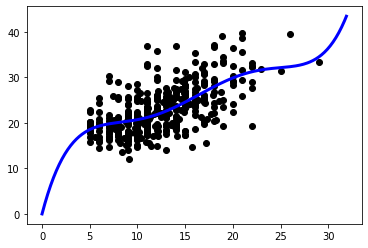

In [17]:
X_test_range = pd.DataFrame()
X_test_range['TDC-Desc'] = pd.Series(np.arange(0, 32, 0.1).tolist())

plt.scatter(X_test_tradicional, y_test_tradicional,  color='black')
plt.plot(X_test_range, model_tradicional.predict(polynomial_features_trad.fit_transform(X_test_range)), color='blue', linewidth=3)
plt.show()

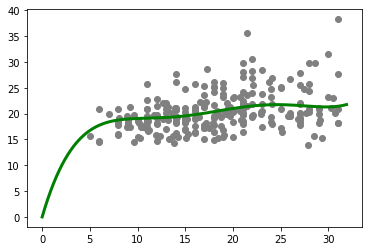

In [18]:
plt.scatter(X_test_frio, y_test_frio, color='grey')
plt.plot(X_test_range, model_frio.predict(polynomial_features_frio.fit_transform(X_test_range)), color='green', linewidth=3)
plt.show()

In [19]:
## Formula de Diego Zegarra
y_frio = mareas_tdc_frio_df[y_feature]
X_frio = mareas_tdc_frio_df[baseline_feature]
y_baseline = (1.76159 * 10**-6) * X_frio**5 - 0.000284*X_frio**4 + 0.01643*X_frio**3 - 0.4183*X_frio**2 + 4.75021*X_frio
error_baseline_frio = mean_absolute_error(y_frio, y_baseline)
print('error_diego_model_frio', error_baseline_frio)

y_tradicional = mareas_tdc_tradicional_df[y_feature]
X_tradicional = mareas_tdc_tradicional_df[baseline_feature]
y_baseline = (1.3916 * 10**-5) * X_tradicional**5 - 0.00172*X_tradicional**4 + 0.0713*X_tradicional**3 - 1.198*X_tradicional**2 + 8.508*X_tradicional
error_baseline_tradicional = mean_absolute_error(y_tradicional, y_baseline)
print('error_diego_model_tradicional', error_baseline_tradicional)

error_diego_model_frio 2.7735991673935225
error_diego_model_tradicional 3.3916642858204273


In [20]:
## Formula de Manuel
y_frio = mareas_tdc_frio_df[y_feature]
X_frio = mareas_tdc_frio_df[baseline_feature]
y_baseline = 1.46184258e-05* X_frio**5 -1.38737645e-03*X_frio**4 + 4.92813314e-02*X_frio**3 -8.12249406e-01*X_frio**2 + 6.34283538e+00*X_frio
error_baseline_frio = mean_absolute_error(y_frio, y_baseline)
print('error_manuel_model_frio', error_baseline_frio)

y_tradicional = mareas_tdc_tradicional_df[y_feature]
X_tradicional = mareas_tdc_tradicional_df[baseline_feature]
y_baseline = 3.70670930e-05* X_tradicional**5 -3.06803767e-03*X_tradicional**4 + 9.28971935e-02*X_tradicional**3 -1.25298480e+00*X_tradicional**2 + 8.00813747e+00*X_tradicional
error_baseline_tradicional = mean_absolute_error(y_tradicional, y_baseline)
print('error_manuel_model_tradicional', error_baseline_tradicional)

error_manuel_model_frio 2.719816328302298
error_manuel_model_tradicional 3.0532942921046167
